In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv("winequality.csv")
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import preprocessing
from sklearn import metrics
import matplotlib.pyplot as plt

In [4]:
df['quality'].shape

(1599,)

In [5]:
X = df.drop('quality', axis='columns')
y = df.quality

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [7]:
from sklearn.tree import DecisionTreeClassifier 

clf = DecisionTreeClassifier()


# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

print('Decision tree has ' +  str(clf.tree_.node_count) + ' nodes with maximum depth ' + str(clf.tree_.max_depth))

y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Decision tree has 667 nodes with maximum depth 17
Accuracy: 0.64375


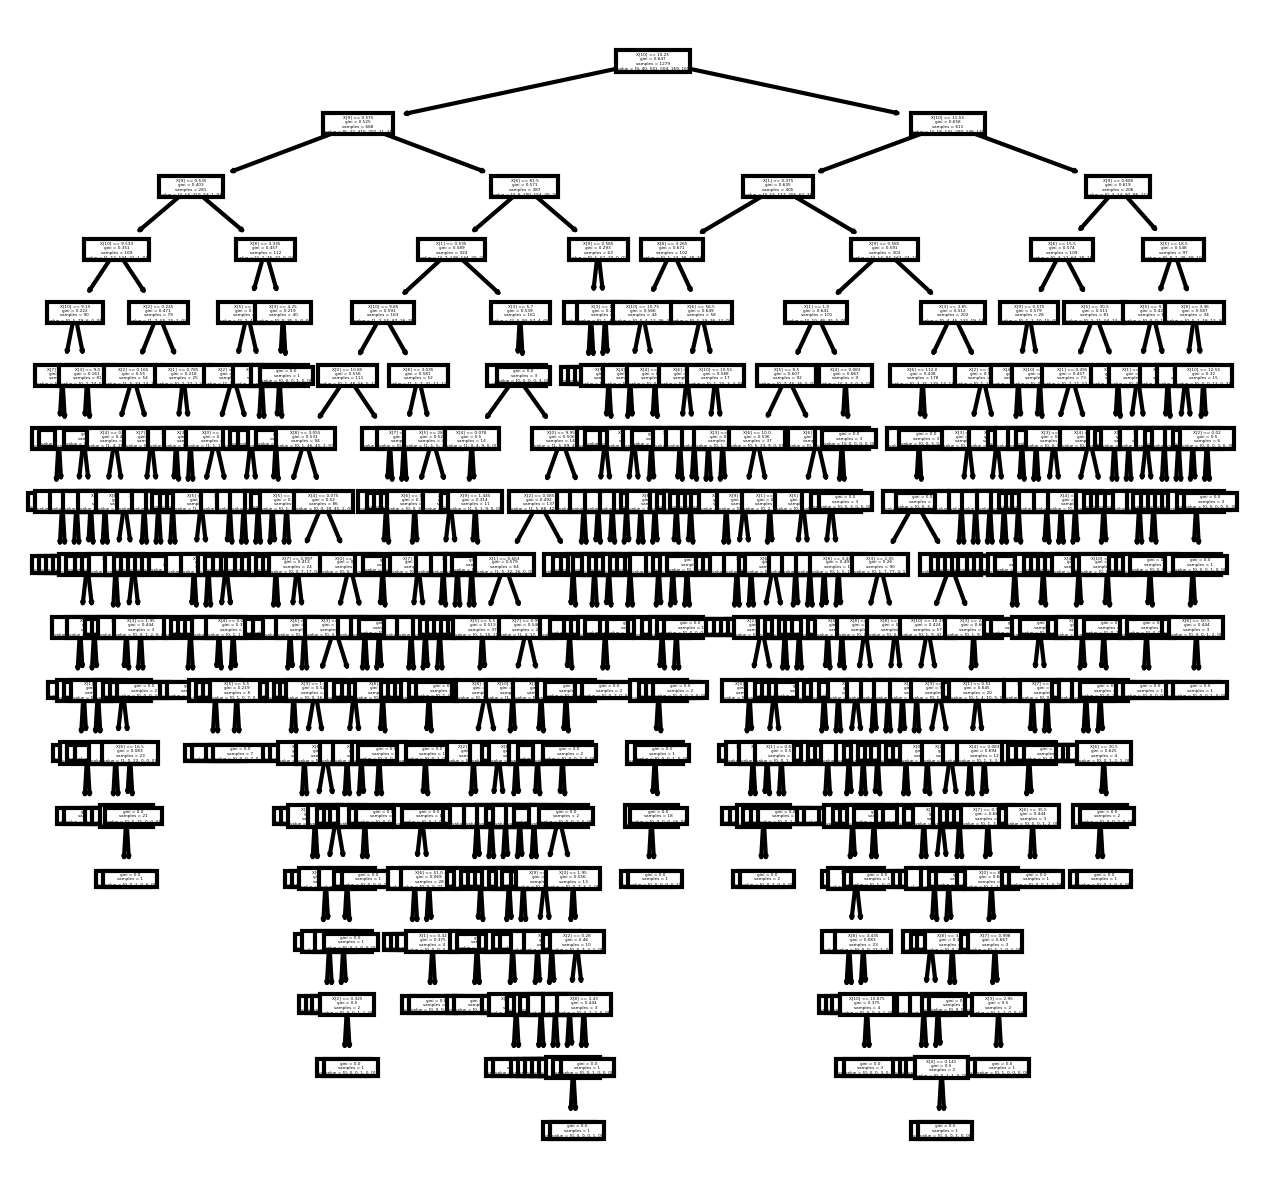

In [8]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5), dpi = 300)

tree.plot_tree(clf);

In [9]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [10]:
knn.score(X_test, y_test)

0.575

In [11]:
X_new = np.array([[7,.27,.36,20.7,.045,170,1.001,3,45,8.8,6]])
prediction = knn.predict(X_new)

/Users/elizabethrodriguez/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [12]:
y_pred = knn.predict(X_test)

In [13]:

k_range = range(1,21)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred=knn.predict(X_test)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))

In [14]:
scores

{1: 0.575,
 2: 0.540625,
 3: 0.509375,
 4: 0.51875,
 5: 0.503125,
 6: 0.49375,
 7: 0.5,
 8: 0.521875,
 9: 0.515625,
 10: 0.528125,
 11: 0.528125,
 12: 0.5375,
 13: 0.5375,
 14: 0.525,
 15: 0.528125,
 16: 0.51875,
 17: 0.525,
 18: 0.53125,
 19: 0.521875,
 20: 0.534375}

Text(0, 0.5, 'Testing Accuracy')

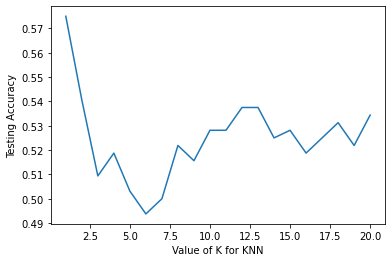

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [16]:
#Question 2

In [17]:
df2 = pd.read_csv("Customer.csv")
df2.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001003   Male     Yes          1      Graduate            No   
1  LP001005   Male     Yes          0      Graduate           Yes   
2  LP001006   Male     Yes          0  Not Graduate            No   
3  LP001008   Male      No          0      Graduate            No   
4  LP001013   Male     Yes          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             4583             1508.0       128.0             360.0   
1             3000                0.0        66.0             360.0   
2             2583             2358.0       120.0             360.0   
3             6000                0.0       141.0             360.0   
4             2333             1516.0        95.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Rural           N  
1             1.0         Urban           Y  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [18]:
le = preprocessing.LabelEncoder()
loan_encoded=le.fit_transform(df2['Loan_Status'])
gender_encoded=le.fit_transform(df2['Gender'])
marriage_encoded=le.fit_transform(df2['Married'])
education_encoded=le.fit_transform(df2['Education'])
term_encoded=le.fit_transform(df2['Loan_Amount_Term'])
area_encoded=le.fit_transform(df2['Property_Area'])
df2['Loan_Status']=loan_encoded
df2['Gender']=gender_encoded
df2['Married']=marriage_encoded
df2['Education']=education_encoded
df2['Loan_Amount_Term']=term_encoded
df2['Property_Area']=area_encoded
df2= df2.drop('Loan_ID', axis='columns')

In [19]:
df2

Gender  Married Dependents  Education Self_Employed  ApplicantIncome  \
0         1        1          1          0            No             4583   
1         1        1          0          0           Yes             3000   
2         1        1          0          1            No             2583   
3         1        0          0          0            No             6000   
4         1        1          0          1            No             2333   
..      ...      ...        ...        ...           ...              ...   
376       1        1         3+          0            No             5703   
377       1        1          0          0            No             3232   
378       0        0          0          0            No             2900   
379       1        1         3+          0            No             4106   
380       0        0          0          0           Yes             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0               1508.0       128.0                 8             1.0   
1                  0.0        66.0                 8             1.0   
2               2358.0       120.0                 8             1.0   
3                  0.0       141.0                 8             1.0   
4               1516.0        95.0                 8             1.0   
..                 ...         ...               ...             ...   
376                0.0       128.0                 8             1.0   
377             1950.0       108.0                 8             1.0   
378                0.0        71.0                 8             1.0   
379                0.0        40.0                 5             1.0   
380                0.0       133.0                 8             0.0   

     Property_Area  Loan_Status  
0                0            0  
1                2            1  
2                2            1  
3                2            1  
4                2            1  
..             ...          ...  
376              2            1  
377              0            1  
378              0            1  
379              0            1  
380              1            0  

[381 rows x 12 columns]

In [20]:
feature_cols = ['Gender', 'Married','Education','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term',
                'Credit_History','Property_Area']
X = df2[feature_cols] 
y = df2['Loan_Status']

In [21]:
X = X.fillna(X.mean())
y = y.fillna(y.mean())

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [23]:
clf = DecisionTreeClassifier()

clf = clf.fit(x_train,y_train)

print('Decision tree has ' +  str(clf.tree_.node_count) + ' nodes with maximum depth ' + str(clf.tree_.max_depth))

y_pred = clf.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Decision tree has 123 nodes with maximum depth 14
Accuracy: 0.7532467532467533


In [24]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (50,50), dpi = 500)

tree.plot_tree(clf)
plt.savefig('customer.jpg',format='jpg',bbox_inches = "tight")

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')

In [27]:
model.fit(x_train,y_train)

RandomForestClassifier(max_features='sqrt')

In [28]:
y_pred = model.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8831168831168831


In [29]:
import seaborn as sns

In [30]:
importances = model.feature_importances_

sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = df2.columns[1:]
 
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) Loan_Amount_Term               0.325827
 2) Self_Employed                  0.205578
 3) CoapplicantIncome              0.165258
 4) ApplicantIncome                0.105721
 5) Credit_History                 0.065653
 6) LoanAmount                     0.047837
 7) Married                        0.030717
 8) Dependents                     0.028799
 9) Education                      0.024611


IndexError: index 9 is out of bounds for axis 0 with size 9

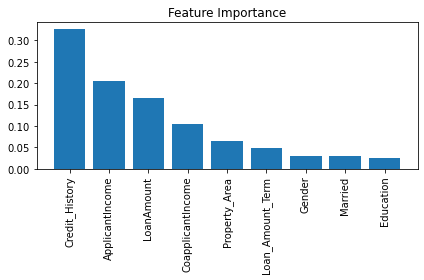

In [31]:
 
plt.title('Feature Importance')
plt.bar(range(x_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(x_train.shape[1]), x_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show() #tried to show only top 3 but kept getting an error when replacing range to 3 instead  of shape 

In [32]:
df3 = pd.read_csv("Mall_Customers.csv") 
df3.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
import seaborn as sns

In [34]:
gender_encoded=le.fit_transform(df3['Gender'])
df3['Gender']=gender_encoded

In [35]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df3)
    distortions.append(kmeanModel.inertia_)

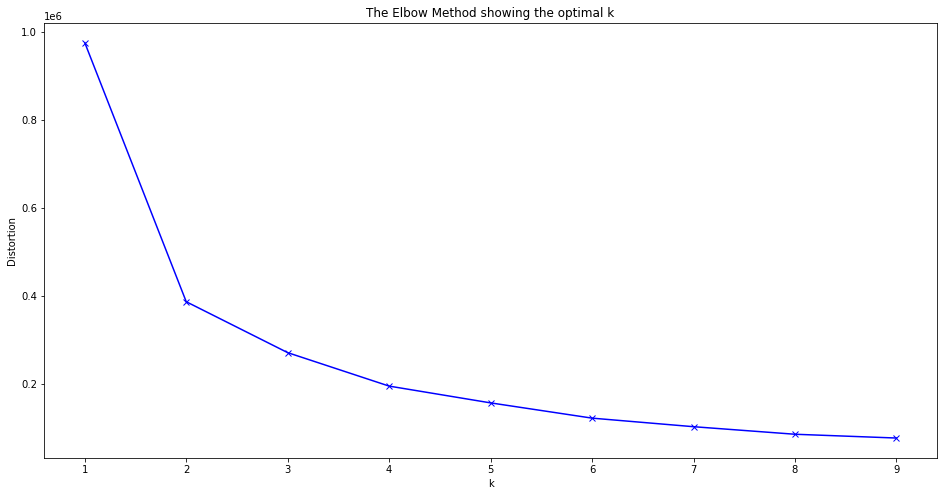

In [36]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

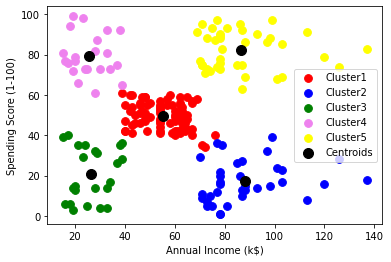

In [37]:
kmeans = KMeans(n_clusters = 5, init = "k-means++", random_state = 42)
X = df3.iloc[:, [3, 4]].values
from sklearn.cluster import KMeans
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 60, c = 'violet', label = 'Cluster4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 60, c = 'yellow', label = 'Cluster5') 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.xlabel('Annual Income (k$)') 
plt.ylabel('Spending Score (1-100)') 
plt.legend() 

plt.show()